In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Generate synthetic imbalanced dataset

In [14]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=12, hypercube=False, class_sep=5)

Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Vizualise the plot of features vs class labels

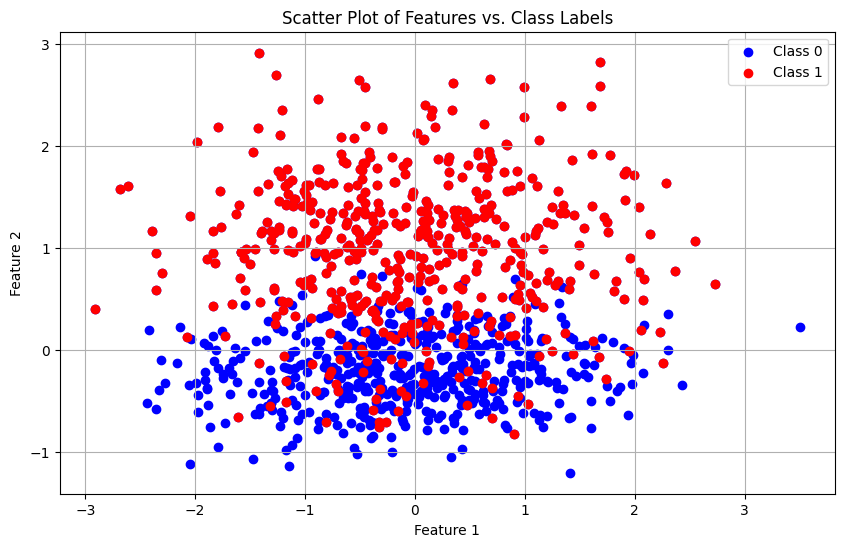

In [16]:
plt.figure(figsize=(10, 6))
# plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X[:,0], X[:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features vs. Class Labels')
plt.legend()
plt.grid(True)
plt.show()

**LOGISTIC REGRESSION**

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_tain)

LogisticRegression()

In [18]:
# Predict probabilities on test set
y_score = model.predict_proba(X_test).round(3)[:,1]
y_score

array([0.251, 0.019, 0.062, 0.88 , 0.972, 1.   , 0.967, 0.17 , 0.079,
       0.898, 0.992, 0.996, 0.956, 0.701, 0.463, 0.144, 0.09 , 0.968,
       0.976, 0.687, 0.973, 0.91 , 0.049, 0.961, 0.995, 0.992, 0.917,
       0.97 , 0.405, 0.978, 0.026, 1.   , 0.931, 0.112, 0.409, 0.006,
       0.173, 0.948, 0.59 , 0.026, 0.069, 0.153, 0.128, 0.037, 0.981,
       0.21 , 0.977, 0.026, 0.241, 0.383, 0.248, 0.008, 0.3  , 0.99 ,
       0.97 , 0.977, 0.082, 0.142, 0.586, 0.385, 0.659, 0.999, 0.589,
       0.226, 0.714, 0.136, 0.109, 0.791, 0.597, 0.422, 0.073, 0.577,
       1.   , 0.22 , 0.128, 0.961, 0.164, 0.191, 0.924, 0.962, 0.693,
       0.939, 0.656, 0.784, 0.926, 0.235, 0.107, 0.971, 0.102, 0.995,
       0.376, 0.086, 0.053, 0.078, 0.046, 0.398, 0.993, 0.239, 0.186,
       0.971, 0.109, 0.827, 0.132, 0.999, 0.108, 0.449, 0.991, 0.229,
       0.07 , 0.205, 0.044, 0.309, 0.09 , 0.482, 0.23 , 0.115, 0.183,
       0.14 , 0.859, 0.182, 0.258, 0.023, 0.583, 0.97 , 0.25 , 0.184,
       0.066, 0.997,

**METRICS**

In [19]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

**ROC-AUC**

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr)

**PR-AUC**

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

**ROC-AUC V PR-AUC**

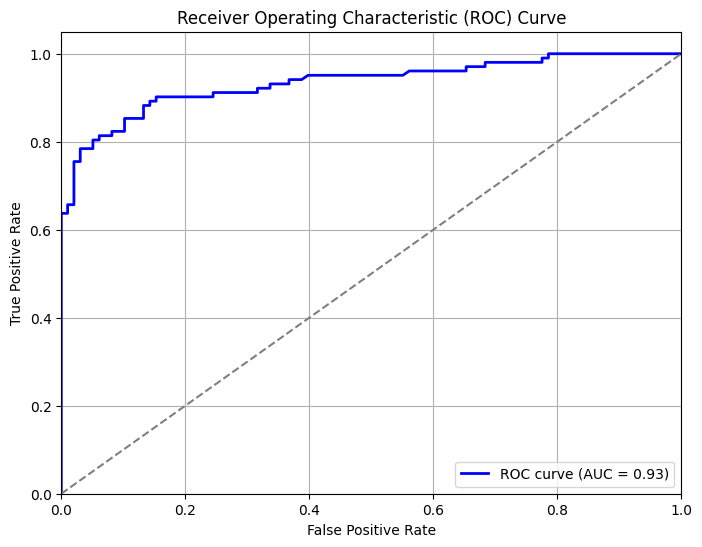

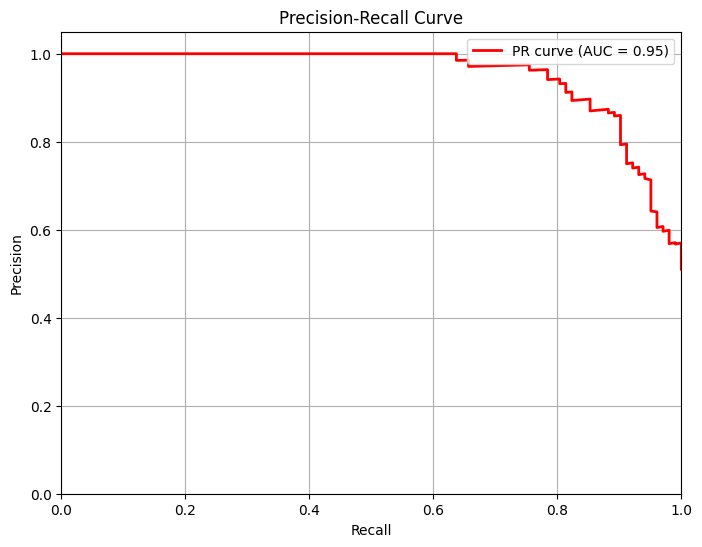

In [22]:

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()


Plot Decision Boundary

In [23]:
def plot_decision_boundary(X, y, model):
    # Plot the input datapoints
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

    # Show plot
    plt.colorbar(label='Class')
    plt.grid(True)
    plt.show()

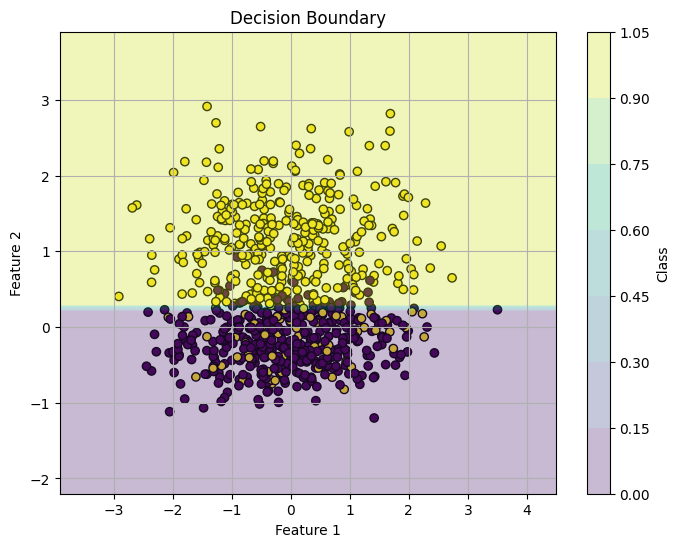

In [24]:
plot_decision_boundary(X_train, y_train, model)